Epoch [1] - Train Loss: 0.1713, Val Loss: 0.0689
              Train L1: 0.1713,  Val L1: 0.0689
Epoch [2] - Train Loss: 0.0458, Val Loss: 0.0293
              Train L1: 0.0458,  Val L1: 0.0293
Epoch [3] - Train Loss: 0.0252, Val Loss: 0.0195
              Train L1: 0.0252,  Val L1: 0.0195
Epoch [4] - Train Loss: 0.0193, Val Loss: 0.0160
              Train L1: 0.0193,  Val L1: 0.0160
Epoch [5] - Train Loss: 0.0167, Val Loss: 0.0143
              Train L1: 0.0167,  Val L1: 0.0143
Epoch [6] - Train Loss: 0.0153, Val Loss: 0.0133
              Train L1: 0.0153,  Val L1: 0.0133
Epoch [7] - Train Loss: 0.0144, Val Loss: 0.0128
              Train L1: 0.0144,  Val L1: 0.0128
Epoch [8] - Train Loss: 0.0138, Val Loss: 0.0123
              Train L1: 0.0138,  Val L1: 0.0123
Epoch [9] - Train Loss: 0.0134, Val Loss: 0.0117
              Train L1: 0.0134,  Val L1: 0.0117
Epoch [10] - Train Loss: 0.0130, Val Loss: 0.0115
              Train L1: 0.0130,  Val L1: 0.0115
Epoch [11] - Train Loss: 0.01

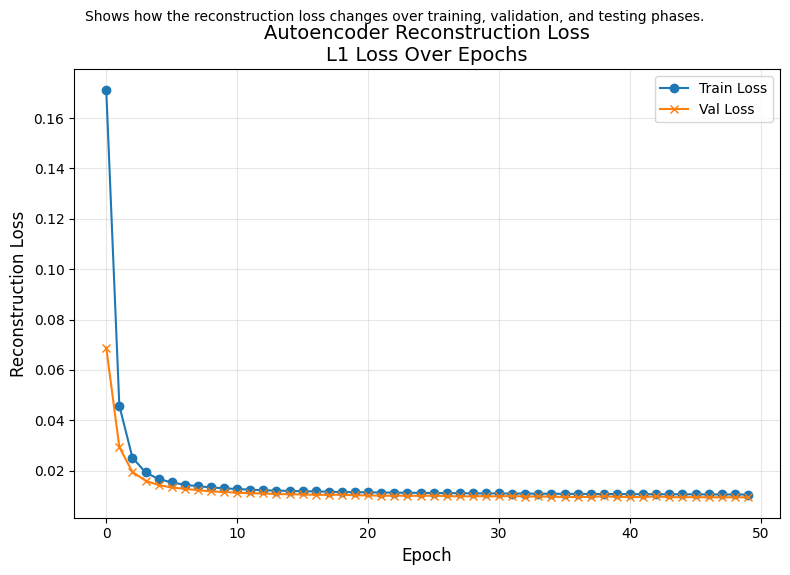

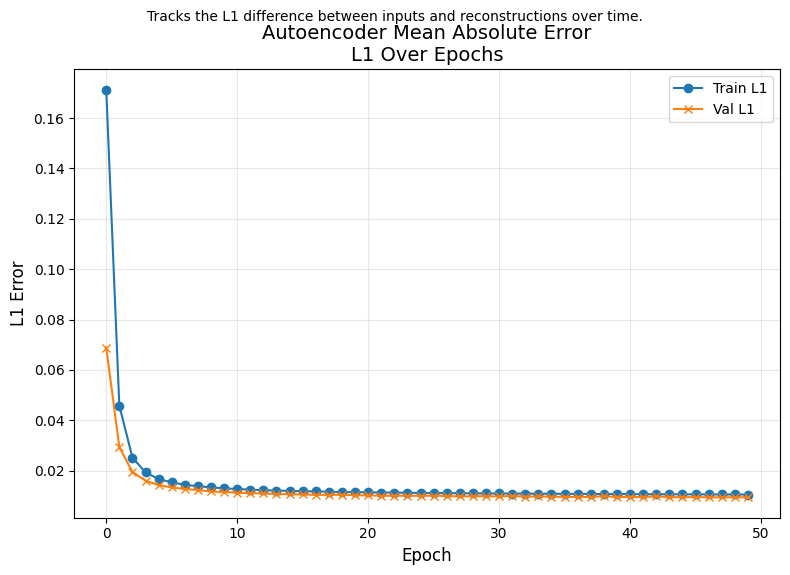

=== Final Autoencoder Metrics ===
Train ReconLoss: 0.0105
Val   ReconLoss: 0.0094
Train L1: 0.0105
Val   L1: 0.0094


In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')
from models.mnist_autoencoder import MNISTAutoencoder
from trainers.autoencoder_trainer import AutoencoderTrainer
from models.mnist_classifier import MNISTClassifier
from trainers.classifier_trainer import ClassifierTrainer

data_path = "/datasets/cv_datasets/data"
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=5),
    transforms.RandomAffine(0, translate=(0.05, 0.05)),
    transforms.ToTensor()
])
val_transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root=data_path, train=True, download=False, transform=train_transform)
val_dataset   = datasets.MNIST(root=data_path, train=False, download=False, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
autoencoder_l1_loss = MNISTAutoencoder(latent_dim=128)
autoencoder_trainer = AutoencoderTrainer(
model=autoencoder_l1_loss,
train_loader=train_loader,
val_loader=val_loader,
criterion=torch.nn.L1Loss(),
device='cuda',
lr=1e-4,
num_epochs=60,
weight_decay=1e-4,
)
autoencoder_trainer.train()
autoencoder_trainer.plot_metrics()


Epoch [1] - TrainAcc: 0.7700, ValAcc: 0.9128 | ValLoss: 0.3203
Epoch [2] - TrainAcc: 0.8691, ValAcc: 0.9347 | ValLoss: 0.2448
Epoch [3] - TrainAcc: 0.8982, ValAcc: 0.9468 | ValLoss: 0.1984
Epoch [4] - TrainAcc: 0.9202, ValAcc: 0.9542 | ValLoss: 0.1648
Epoch [5] - TrainAcc: 0.9339, ValAcc: 0.9609 | ValLoss: 0.1414
Epoch [6] - TrainAcc: 0.9429, ValAcc: 0.9662 | ValLoss: 0.1234
Epoch [7] - TrainAcc: 0.9487, ValAcc: 0.9696 | ValLoss: 0.1110
Epoch [8] - TrainAcc: 0.9534, ValAcc: 0.9709 | ValLoss: 0.1020
Epoch [9] - TrainAcc: 0.9573, ValAcc: 0.9732 | ValLoss: 0.0959
Epoch [10] - TrainAcc: 0.9592, ValAcc: 0.9743 | ValLoss: 0.0891
Epoch [11] - TrainAcc: 0.9623, ValAcc: 0.9753 | ValLoss: 0.0859
Epoch [12] - TrainAcc: 0.9634, ValAcc: 0.9755 | ValLoss: 0.0802
Epoch [13] - TrainAcc: 0.9657, ValAcc: 0.9764 | ValLoss: 0.0790
Epoch [14] - TrainAcc: 0.9667, ValAcc: 0.9789 | ValLoss: 0.0745
Epoch [15] - TrainAcc: 0.9670, ValAcc: 0.9777 | ValLoss: 0.0729
Epoch [16] - TrainAcc: 0.9693, ValAcc: 0.9796 | V

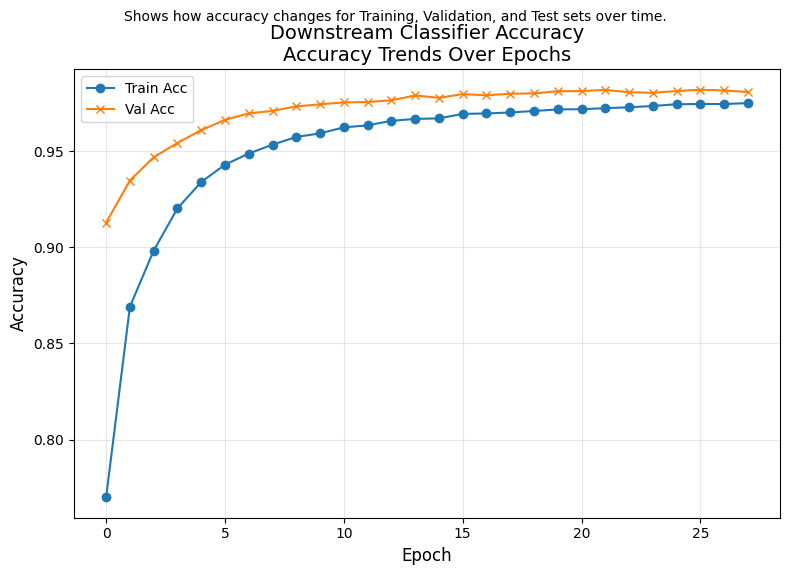

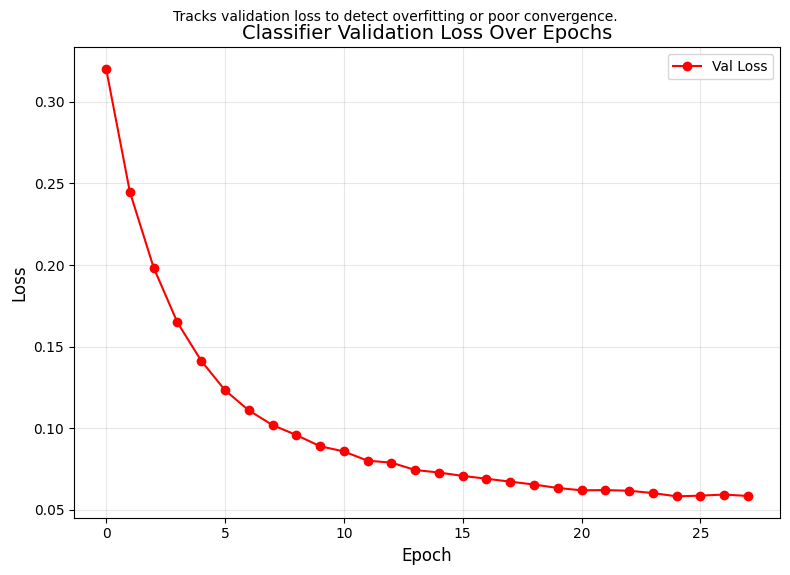

=== Final Classifier Metrics ===
Val Loss: 0.0586
Train Acc: 97.49%
Val   Acc: 98.07%


In [2]:
classifier2 = MNISTClassifier(latent_dim=128, num_classes=10)
classifier_trainer2 = ClassifierTrainer(
encoder=autoencoder_l1_loss.encoder,
classifier=classifier2,
train_loader=train_loader,
val_loader=val_loader,
num_epochs=40,
patience=3
)
classifier_trainer2.train() 
print("Autoencoder training done.")
classifier_trainer2.plot_metrics()

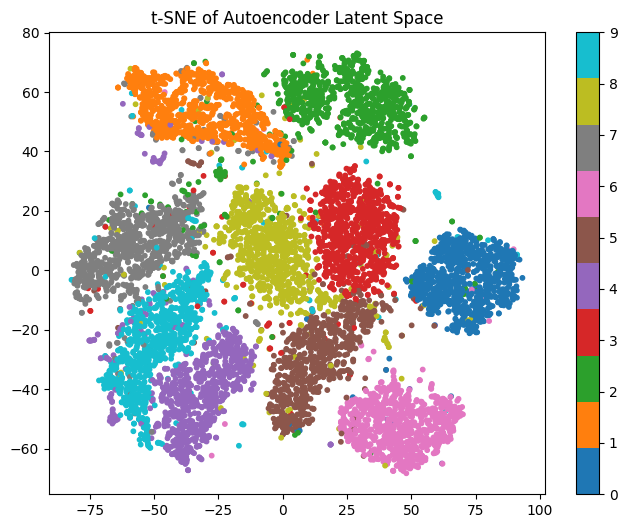

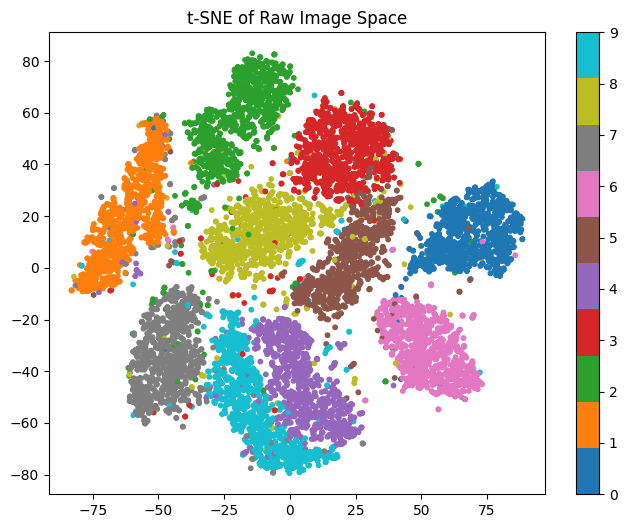

In [3]:
from utils import plot_tsne_autoencoder
plot_tsne_autoencoder(autoencoder_l1_loss, val_loader, device='cuda')

